In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("GPU :",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

GPU : 1


In [3]:
(train_img,train_lab),(test_img,test_lab)=datasets.cifar10.load_data()
train_img,test_img=train_img/255.0,test_img/255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 3s 0us/step


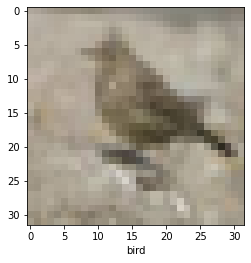

In [4]:
IMG_index=120
plt.imshow(train_img[IMG_index],cmap=plt.cm.binary)
plt.xlabel(class_names[train_lab[IMG_index][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
train_img.shape

(50000, 32, 32, 3)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history=model.fit(train_img,train_lab,epochs=4,validation_data=(test_img,test_lab))

Epoch 1/4
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5723 - accuracy: 0.4214 - val_loss: 1.2938 - val_accuracy: 0.5316
Epoch 2/4
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2024 - accuracy: 0.5706 - val_loss: 1.1083 - val_accuracy: 0.6034
Epoch 3/4
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0551 - accuracy: 0.6223 - val_loss: 1.0052 - val_accuracy: 0.6375
Epoch 4/4
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9638 - accuracy: 0.6585 - val_loss: 0.9591 - val_accuracy: 0.6578


In [12]:
test_loss,test_acc=model.evaluate(test_img,test_lab,verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.9591 - accuracy: 0.6578
0.657800018787384


In [13]:
import numpy as np
np.argmax(model.predict(test_img[[0]]))


3

In [14]:
test_lab[[0]]

array([[3]], dtype=uint8)

In [15]:
test_img.shape

(10000, 32, 32, 3)

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8156801972249077087, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12544915790220881684
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3405961311181993142
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12573912561282030280
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [16]:
tf.__version__

'2.3.0'

In [ ]:
!ls

sample_data
